# Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Data Cleaning

In [2]:
main_dir = "C:/Users/Vinicius/Desktop/DATA SCIENCE/BOOTCAMP/Projeto - IoT/cargas_eletricas"
df_original = pd.read_csv(f"{main_dir}/data/raw/db.csv")
df = df_original.copy()
df

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.70,4.70,2.70,-0.30,0.70,0.70,2.70,1.70,1.70,0.70,...,-0.30,-0.30,-0.30,0.70,-0.30,0.70,-1.30,-1.30,-0.30,5
96,11.55,5.55,2.55,1.55,0.55,1.55,0.55,0.55,-0.45,0.55,...,0.55,-0.45,0.55,-1.45,0.55,-0.45,0.55,-0.45,0.55,6
97,14.35,4.35,1.35,2.35,-0.65,0.35,0.35,1.35,0.35,0.35,...,-0.65,0.35,-0.65,0.35,-1.65,0.35,0.35,0.35,-0.65,6
98,22.70,-5.30,-0.30,-5.30,-1.30,-3.30,-1.30,-3.30,-2.30,-3.30,...,-2.30,1.70,-1.30,1.70,-0.30,0.70,-2.30,0.70,-1.30,7


In [3]:
df.isnull().sum().sum() # The dataframe does not have null values

0

In [20]:
df['Classes'].value_counts() # There are 7 classes of objects

3    30
2    22
1    16
5    16
4     8
6     4
7     4
Name: Classes, dtype: int64

### Data Scaling

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Classes', axis=1))
X = pd.DataFrame(X, columns=df.drop('Classes', axis=1).columns)
Y = df['Classes']
X

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199
0,1.271217,1.787101,1.676505,1.981957,1.975585,2.199220,2.059457,2.069381,1.816539,2.330403,...,-1.183491,0.395225,-0.994649,1.388521,-1.148965,0.888936,-0.387690,1.539007,0.140282,0.222966
1,1.172566,1.675588,1.563579,1.533195,1.619110,1.836032,1.937350,1.948548,1.816539,1.823958,...,-0.157936,-0.496930,1.334740,0.176897,0.842309,-0.914180,-0.387690,-1.013243,1.101117,0.222966
2,-1.150666,-0.950533,-0.982911,-0.435748,0.721981,0.558824,1.381763,1.398759,1.628152,1.754322,...,0.303564,-0.296195,0.694158,-0.489496,0.294708,-0.508479,0.078782,-0.438987,0.572658,-0.436342
3,0.117000,0.259378,0.806972,0.893709,1.060632,1.024914,1.241340,1.138969,1.245301,1.102276,...,0.149731,-0.363107,0.519454,-0.671240,0.145363,-0.643713,0.959895,-0.630406,1.389368,-0.616153
4,1.355071,-0.571390,-0.260182,-0.951824,-0.537564,-0.966562,-0.645213,-0.969561,-0.754035,-0.980476,...,0.713786,-0.117764,1.160036,-1.216470,-0.302674,-1.049414,0.493423,0.071463,0.956992,0.043155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.353763,-0.365092,-0.615901,-0.856462,-0.793038,-0.742597,-0.541422,-0.625188,-0.650726,-0.746245,...,0.559953,-0.184676,-0.179363,-0.186590,0.543618,-0.283089,0.337933,-1.396081,-1.108804,-0.136656
96,0.043012,-0.270306,-0.632840,-0.648910,-0.810862,-0.639694,-0.803952,-0.764146,-0.912037,-0.765237,...,-0.619435,0.194490,-0.354067,0.843290,-1.597001,0.483235,-0.854162,0.964750,-0.292094,0.882273
97,0.319235,-0.404122,-0.768351,-0.559157,-0.953452,-0.784969,-0.828374,-0.667480,-0.814805,-0.790559,...,0.201009,-0.340803,0.577689,-0.610658,0.195145,-1.500193,-0.024878,0.709525,0.476574,-0.556216
98,1.142971,-1.480218,-0.954680,-1.417414,-1.030688,-1.226846,-1.029850,-1.229352,-1.136887,-1.252689,...,1.585508,-1.076831,2.150026,-1.398214,1.539254,-0.283089,0.337933,-2.672206,0.812867,-1.335397


### Data Transformation

In [8]:
pca = PCA()
pca.fit(X)

PCA()

In [9]:
pca.components_

array([[ 0.03641504,  0.05466735,  0.07144574, ..., -0.03881237,
         0.02874824, -0.04061419],
       [ 0.00996834,  0.08416797,  0.06359799, ...,  0.09879575,
        -0.10792135,  0.09925588],
       [-0.03280483, -0.02964096, -0.05413865, ..., -0.00768807,
        -0.04591803, -0.0457607 ],
       ...,
       [-0.04220476, -0.06100152, -0.0139125 , ..., -0.03023252,
        -0.0130336 ,  0.00123191],
       [ 0.01664068,  0.00994016,  0.03384042, ..., -0.01968062,
        -0.09882508, -0.00835744],
       [ 0.05453152,  0.58408673, -0.26117136, ..., -0.040917  ,
         0.06267518, -0.0214413 ]])

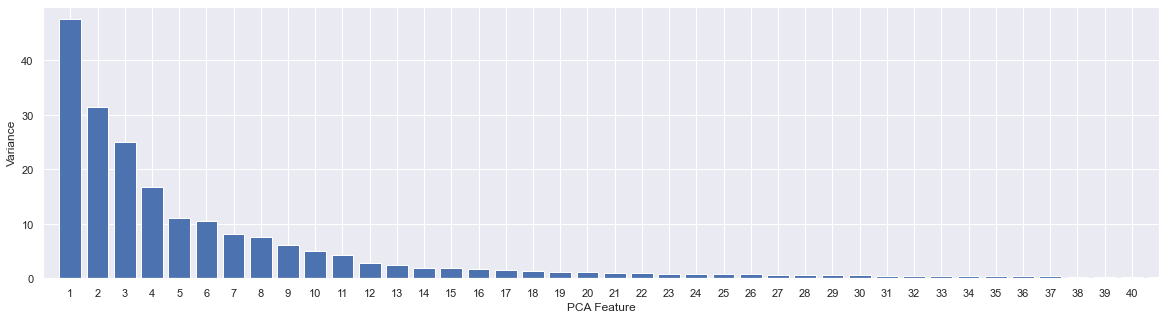

In [10]:
plt.figure(figsize=(20,5))
plt.bar(range(1, 101), pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.xlim(0,41)
plt.xticks(range(1, 41))
plt.show()

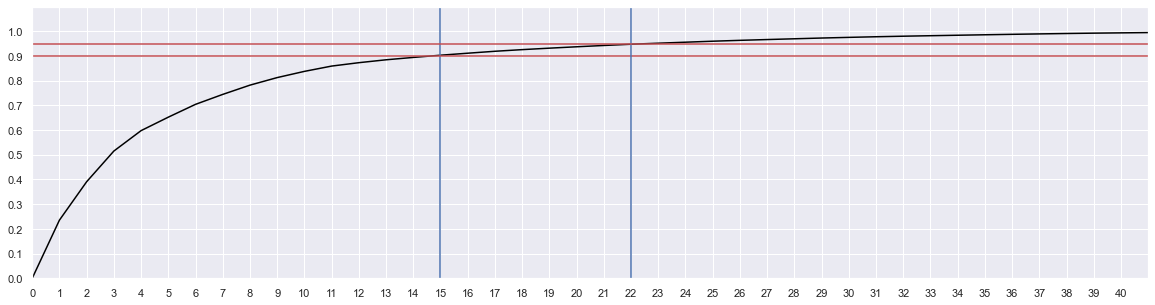

In [11]:
plt.figure(figsize=(20,5))
pca_cumsum = np.cumsum(pca.explained_variance_ratio_)
pca_cumsum = np.insert(pca_cumsum, 0, 0)
plt.plot(pca_cumsum, color='black')
plt.xlim(0,41)
plt.ylim(0,1.1)
plt.xticks(np.arange(0,41))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(15, c='b')
plt.axhline(0.90, c='r')
plt.axvline(22, c='b')
plt.axhline(0.95, c='r')
plt.show()

In [21]:
pca_15 = PCA(n_components=15)
X_pca = pca_15.fit_transform(X)
pca_col_names = [f"PC_{i}" for i in range(0,15)]
X_pca = pd.DataFrame(X_pca, columns=pca_col_names)
X_pca

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14
0,0.804739,9.932256,-2.952120,1.727607,1.139999,1.220739,-3.010333,6.213570,-0.245333,-4.947468,3.224966,-0.333513,1.028451,-1.138487,-0.724202
1,16.187274,-0.789747,-4.951606,4.676206,0.482721,4.361189,-1.154607,-0.333671,-0.566406,0.654430,-2.366882,-1.191813,-2.809570,1.463848,-0.549039
2,4.970044,-1.496823,-6.723726,1.026952,-0.778361,-1.203140,-2.323602,1.599791,-1.668225,-1.622038,3.157523,0.739755,-0.118455,-1.120964,3.245290
3,2.460069,-2.860497,-5.417960,0.436978,-0.153589,-1.637444,-2.642204,3.179805,-0.552393,-2.282255,2.672498,0.495897,0.048147,-0.114480,0.224475
4,-4.168125,-5.182046,-1.309993,-1.370185,0.030386,0.221138,1.950496,0.416317,1.254989,-2.496386,0.705462,-1.148448,-0.652334,0.492994,-1.778258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-3.147604,-4.117617,-0.477593,-1.120898,-0.850432,0.728094,-0.516973,-1.074211,-0.009713,0.359087,-0.867715,0.493532,-0.515811,0.491301,-0.320257
96,-6.106749,5.479102,2.056551,-0.721723,-1.440073,0.811643,0.444532,-0.957423,-0.112422,-1.579596,-0.670466,-0.316001,-0.048992,-0.485471,0.126146
97,-5.078876,0.747347,1.076584,-0.683721,-0.806197,-0.131654,1.458761,-0.715981,-0.807390,-2.602165,-1.113317,0.742115,-1.413547,0.724775,-1.939868
98,-4.547102,-13.501987,-1.218863,-1.386661,-1.644493,-4.081425,-2.921893,-1.743130,-0.530214,2.492557,-0.590194,0.727877,0.415277,1.097116,-0.958785


In [13]:
data_proc = pd.concat([X_pca,Y],axis=1)
data_proc

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,Classes
0,0.804739,9.932256,-2.952120,1.727607,1.139999,1.220739,-3.010333,6.213570,-0.245333,-4.947468,3.224966,-0.333513,1.028451,-1.138487,-0.724202,1
1,16.187274,-0.789747,-4.951606,4.676206,0.482721,4.361189,-1.154607,-0.333671,-0.566406,0.654430,-2.366882,-1.191813,-2.809570,1.463848,-0.549039,1
2,4.970044,-1.496823,-6.723726,1.026952,-0.778361,-1.203140,-2.323602,1.599791,-1.668225,-1.622038,3.157523,0.739755,-0.118455,-1.120964,3.245290,1
3,2.460069,-2.860497,-5.417960,0.436978,-0.153589,-1.637444,-2.642204,3.179805,-0.552393,-2.282255,2.672498,0.495897,0.048147,-0.114480,0.224475,1
4,-4.168125,-5.182046,-1.309993,-1.370185,0.030386,0.221138,1.950496,0.416317,1.254989,-2.496386,0.705462,-1.148448,-0.652334,0.492994,-1.778258,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-3.147604,-4.117617,-0.477593,-1.120898,-0.850432,0.728094,-0.516973,-1.074211,-0.009713,0.359087,-0.867715,0.493532,-0.515811,0.491301,-0.320257,5
96,-6.106749,5.479102,2.056551,-0.721723,-1.440073,0.811643,0.444532,-0.957423,-0.112422,-1.579596,-0.670466,-0.316001,-0.048992,-0.485471,0.126146,6
97,-5.078876,0.747347,1.076584,-0.683721,-0.806197,-0.131654,1.458761,-0.715981,-0.807390,-2.602165,-1.113317,0.742115,-1.413547,0.724775,-1.939868,6
98,-4.547102,-13.501987,-1.218863,-1.386661,-1.644493,-4.081425,-2.921893,-1.743130,-0.530214,2.492557,-0.590194,0.727877,0.415277,1.097116,-0.958785,7


### Saving

In [18]:
# data_proc.to_csv('C:/Users/Vinicius/desktop/data science/bootcamp/Projeto - IoT/cargas_eletricas/data/processed/pca_15.csv')

* Salvar em .pickle (binário)
    * .to_pickle
* Salvar em .parquet (big data - instalar biblioteca pyarrow)
    * .to_parquet